## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA  
from scipy import stats

## Read & Clean Data

In [2]:
def load_and_prepare_data():
    data = pd.read_csv('shopping_trends.csv')

    # Handle missing values by dropping them for simplicity
    data.dropna(inplace=True)
    
    return data

In [3]:
df=load_and_prepare_data()
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Categorical Graph (Bar Chart)

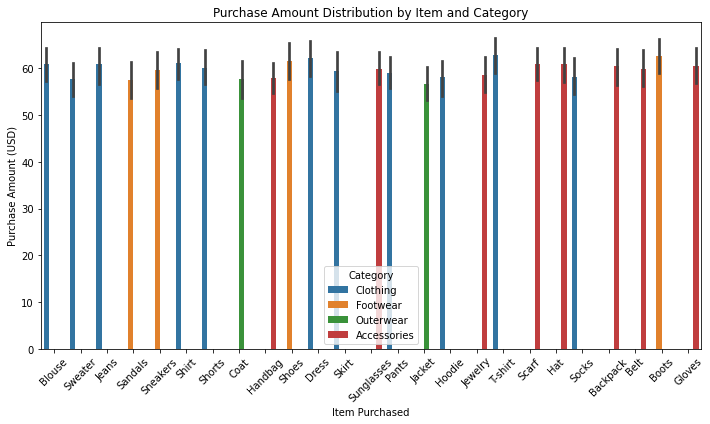

In [4]:
def plot_purchase_distribution(data):
    """
    Create a bar chart showing purchase amounts by category and item
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Item Purchased', y='Purchase Amount (USD)', hue='Category')
    plt.title('Purchase Amount Distribution by Item and Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_purchase_distribution(df)

## Relational Graph (Scatter Plot)

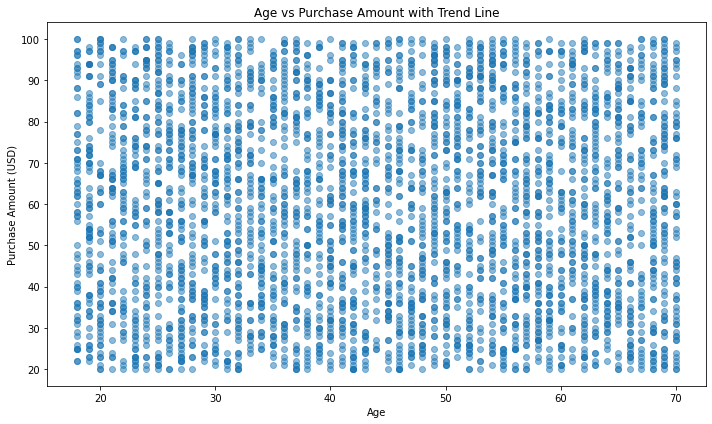

In [5]:
def plot_age_purchase_relationship(data):
    """
    Create a scatter plot with line fit showing age vs purchase amount
    """
    plt.figure(figsize=(10, 6))
    
    # Create scatter plot
    plt.scatter(data['Age'], data['Purchase Amount (USD)'], alpha=0.5)
    
    
    plt.title('Age vs Purchase Amount with Trend Line')
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.tight_layout()
    plt.show()
plot_age_purchase_relationship(df)

## Statistical Graph (HeatMap)

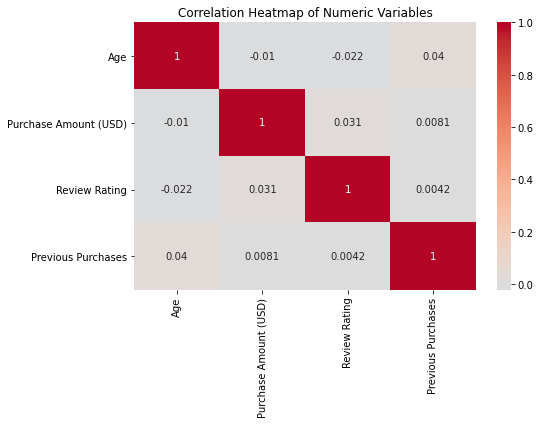

In [6]:
def plot_correlation_heatmap(data):
    """
    Create a correlation heatmap for numeric columns
    """
    numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
    correlation_matrix = data[numeric_cols].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()
plot_correlation_heatmap(df)

## Descriptive Statistics [Mean, Standard Deviation, Skewness & Kurtosis]

In [7]:
def calculate_statistics(data):
    """
    Calculate and display descriptive statistics, skewness, and kurtosis
    """
    numeric_data = data.select_dtypes(include=[np.number])
    
    print("\nDescriptive Statistics:")
    print(numeric_data.describe())
    
    print("\nSkewness:")
    print(numeric_data.skew())
    
    print("\nKurtosis:")
    print(numeric_data.kurtosis())
calculate_statistics(df)


Descriptive Statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  

Skewness:
Customer ID              0.000000
Age                 

## KMeans Clustering (Elbow & Silhouette plots)

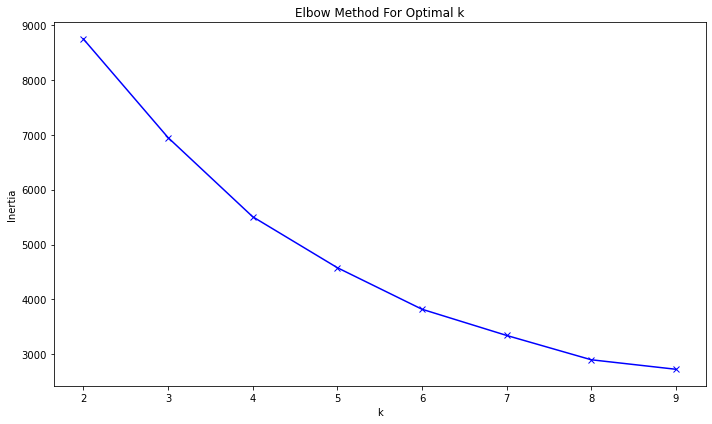

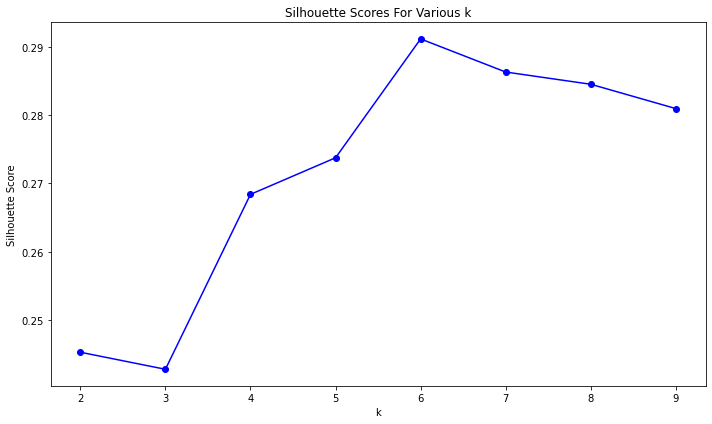

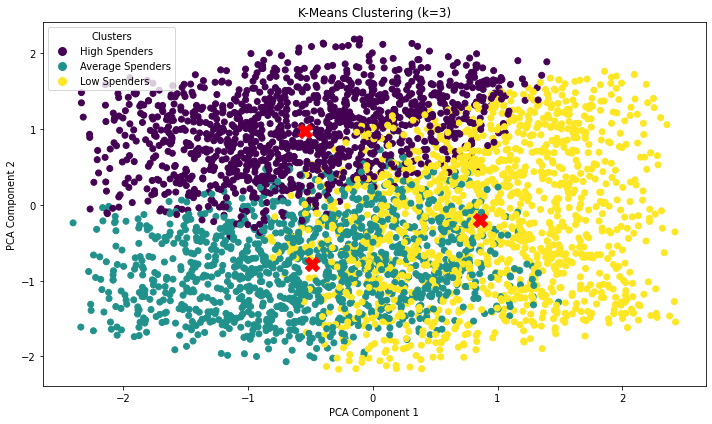

In [9]:
def perform_kmeans_analysis1(data):
    """
    Perform k-means clustering using silhouette/elbow method with optimal clusters of 3
    """
    # Prepare data for clustering
    features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
    X = data[features]
    
    # Normalize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Calculate and plot elbow curve
    inertias = []
    silhouette_scores = []
    K = range(2, 10)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        
        # Compute the silhouette score
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    
    # Plot Elbow Method
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bx-', label='Inertia')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.tight_layout()
    plt.show()
    
    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(K, silhouette_scores, 'bo-', label='Silhouette Score')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores For Various k')
    plt.tight_layout()
    plt.show()
    
    # Perform K-Means with optimal clusters (e.g., k=3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X_scaled)
    data['Cluster'] = kmeans.labels_

    # Plot Clusters with PCA
    pca = PCA(n_components=2)  # <-- PCA class is used here
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
    
    # Adding labels for clusters
    cluster_labels = {0: 'High Spenders', 1: 'Average Spenders', 2: 'Low Spenders'}
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=cluster_labels[cluster], 
                   markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=10) 
        for cluster in range(optimal_k)
    ]
    
    # Add cluster centers
    centers = kmeans.cluster_centers_
    centers_pca = pca.transform(centers)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
    plt.legend(handles=legend_elements, loc='best', title='Clusters')
    
    plt.title(f'K-Means Clustering (k={optimal_k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.tight_layout()
    plt.show()
perform_kmeans_analysis1(df)

## Line Fitting Technique

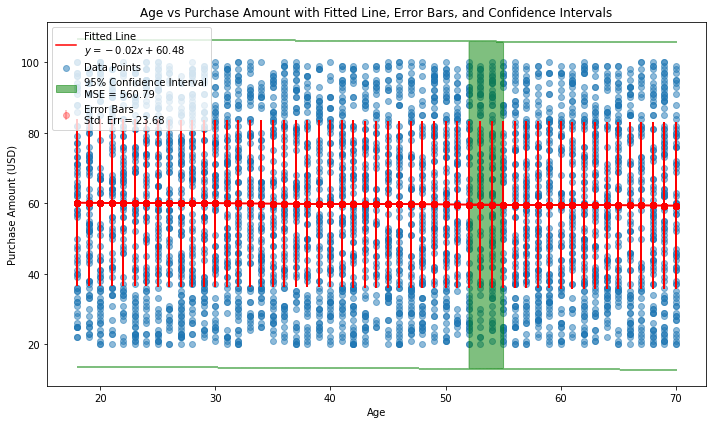

In [15]:
def line_fitting_with_errorbars_and_ci(data):
    """
    Fit a line with error bars and confidence intervals
    
    Args:
        data : The analysis is done through the colums - 'Age' and 'Purchase Amount (USD)'.
    """
    X = data['Age'].values.reshape(-1, 1)
    y = data['Purchase Amount (USD)'].values

    # Fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred
    mse = np.mean(residuals**2)
    std_err = np.sqrt(mse)

    # Generate confidence interval
    ci = 1.96 * std_err  # Assuming 95% confidence interval

    # Plot the data points, fitted line, and error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Age'], data['Purchase Amount (USD)'], alpha=0.5, label="Data Points")
    plt.plot(data['Age'], y_pred, color='red', label=f"Fitted Line\n$y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}$")
    plt.errorbar(
        data['Age'], y_pred, yerr=std_err, fmt='o', color='red', alpha=0.3, label=f"Error Bars\nStd. Err = {std_err:.2f}"
    )

    # Plot confidence interval
    plt.fill_between(
        data['Age'],
        y_pred - ci,
        y_pred + ci,
        color='green',
        alpha=0.5,
        label=f"95% Confidence Interval\nMSE = {mse:.2f}"
    )
    
    plt.title('Age vs Purchase Amount with Fitted Line, Error Bars, and Confidence Intervals')
    plt.xlabel('Age')
    plt.ylabel('Purchase Amount (USD)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
line_fitting_with_errorbars_and_ci(df)